# HR ANALYTICS 

In [1]:
#Librerias
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 

pd.options.display.max_columns = None

In [3]:
#Base de datos 
df = pd.read_csv("D:/DATASET/IBMHR.csv")
df.shape

(1470, 35)

In [185]:
#Seleccionar 5 filas aleatorias para ver que tipo de información contienen
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
219,54,No,Travel_Rarely,1147,Sales,3,3,Marketing,1,303,4,Female,52,3,2,Sales Executive,1,Married,5940,17011,2,Y,No,14,3,4,80,1,16,4,3,6,2,0,5
854,45,No,Travel_Rarely,1457,Research & Development,7,3,Medical,1,1195,1,Female,83,3,1,Research Scientist,3,Married,4477,20100,4,Y,Yes,19,3,3,80,1,7,2,2,3,2,0,2
518,38,No,Travel_Rarely,243,Sales,7,4,Marketing,1,709,4,Female,46,2,2,Sales Executive,4,Single,4028,7791,0,Y,No,20,4,1,80,0,8,2,3,7,7,0,5
286,44,Yes,Travel_Frequently,920,Research & Development,24,3,Life Sciences,1,392,4,Male,43,3,1,Laboratory Technician,3,Divorced,3161,19920,3,Y,Yes,22,4,4,80,1,19,0,1,1,0,0,0
30,33,No,Travel_Rarely,924,Research & Development,2,3,Medical,1,39,3,Male,78,3,1,Laboratory Technician,4,Single,2496,6670,4,Y,No,11,3,4,80,0,7,3,3,1,1,0,0


In [4]:
#Mostrar valores únicos de cada columna
df.apply(lambda x: pd.Series(pd.unique(x))).fillna('').head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Other,,2,3,Male,61,2,1,Research Scientist,2,Married,5130,24907,1,,No,23,4,4,,1,10,3,3,10,7,1,7
2,37,,Non-Travel,1373,Human Resources,2,4,Medical,,4,4,,92,4,3,Laboratory Technician,3,Divorced,2090,2396,6,,,15,,2,,3,7,2,2,0,0,3,0
3,33,,,1392,,3,3,Marketing,,5,1,,56,1,4,Manufacturing Director,1,,2909,23159,9,,,12,,3,,2,6,5,4,8,2,2,2
4,27,,,591,,24,5,Technical Degree,,7,,,40,,5,Healthcare Representative,,,3468,16632,0,,,13,,,,,12,1,,2,5,7,6
5,32,,,1005,,23,,Human Resources,,8,,,79,,,Manager,,,3068,11864,4,,,20,,,,,1,4,,7,9,4,8
6,59,,,1324,,27,,,,10,,,81,,,Sales Representative,,,2670,9964,5,,,22,,,,,17,6,,1,8,8,3
7,30,,,1358,,16,,,,11,,,67,,,Research Director,,,2693,13335,2,,,21,,,,,5,,,9,3,6,11
8,38,,,216,,15,,,,12,,,44,,,Human Resources,,,9526,8787,7,,,17,,,,,3,,,5,6,5,17
9,36,,,1299,,26,,,,13,,,84,,,,,,5237,16577,3,,,14,,,,,31,,,4,13,15,1


Con los valores únicos de cada columna se comprueban sus niveles, se pueden descartar las siguientes:

- EmployeeCount
- Over18
- StandardHours

Pues poseen el mismo valor en todo el dataset. No aportan información.

In [20]:
#Eliminar columnas innecesarias
df1 = df.drop(["EmployeeCount", "Over18", "StandardHours"], axis=1)
df1.head(0)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [7]:
#Estadísticos descriptivos 
df1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Con el estadístico "count" se comprueba que no hay valores Na en el dataset.

Además indica el número de trabajadores en el data set: 1470. 

Aunque en la columna "EmployeNumber" se observa que el mayor numero es 2068. Tal vez en la base de datos no se encuentren todos los trabajadores

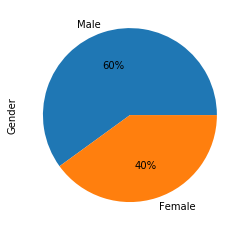

In [9]:
#Sex
Gender = df1["Gender"]
Gender.value_counts().plot.pie(autopct='%1.0f%%')

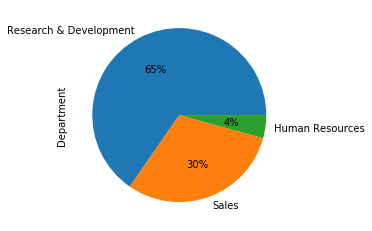

In [10]:
#Empleados por departamento
Department= df1["Department"]
Department.value_counts().plot.pie(autopct='%1.0f%%')

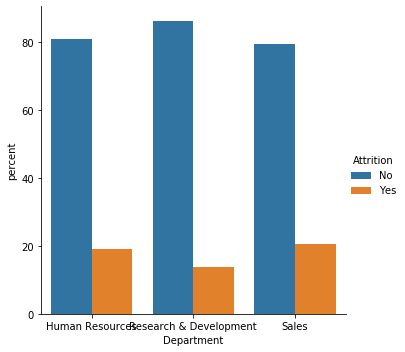

In [12]:
#Porcentajes para de baja laboral por cada departamento
x,y = 'Department', 'Attrition'
df1.groupby(x)[y].value_counts(normalize=True).mul(100)\
.rename('percent').reset_index()\
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')

No hay una gran diferencia, aunque en el departamento de ventas es donde existe mayor rotación (más 20%)

# Predicción rotación 

# PRE-PROCESADO DE DATOS

In [1]:
#Eliminar columnas innecesarias
df = df0.drop(["EmployeeCount", "Over18", "StandardHours"], axis=1)
#Eliminar valores nulos
df = df.dropna()
#Codificar datos categóricos
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

df = df.apply(LabelEncoder().fit_transform)

#Separar variables dependientes e independientes
X = df.drop("Attrition",axis=1)
Y = df["Attrition"]
X_columns = X.columns

# Escalado de variables
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

# Dividir el data set en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

NameError: name 'df0' is not defined

# Regresión Logística: Predicción rotación laboral

In [51]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.8785228377065112

In [84]:
#Pesos de cada variable 
Variables = pd.DataFrame(X_columns)
Variables.columns = ['Variables']
Variables["Peso"]=logreg.coef_[0]
Variables = Variables.reindex(Variables.Peso.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
Variables

,Variables,Peso
0,OverTime,0.802735
1,MonthlyIncome,-0.784717
2,Department,0.552117
3,YearsSinceLastPromotion,0.450992
4,YearsWithCurrManager,-0.444335
5,YearsAtCompany,0.437720
6,NumCompaniesWorked,0.434726
7,EnvironmentSatisfaction,-0.402613
8,YearsInCurrentRole,-0.399829
9,JobSatisfaction,-0.344816


Se observa que la variable OverTime es la que mas peso tiene en la rotación laboral seguido del sueldo: Trabajar mucho y cobrar poco

In [102]:
#Añadir la predicción con la real y comparar (D)
P = logreg.predict(X) 
df0["Predict"]= P
df0["Attrition"]=df["Attrition"]
df0["Error"]= abs(df0["Predict"]-df0["Attrition"])
df0.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Predict,D,Error
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1,0,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0,0,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0,0,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,0,0


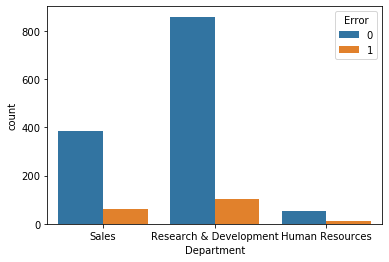

In [103]:
#Errores de predicción por sector 
sns.countplot(data=df0,x='Department', hue='Error')

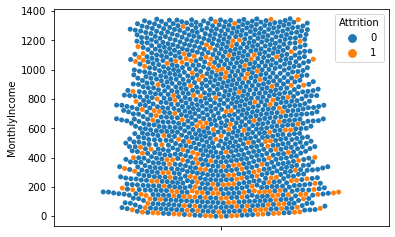

In [101]:
#Distribución rotación y sueldo
a = df["MonthlyIncome"]                   #Variable cuantitativa
b = df["Attrition"]                   #Variable categórica
c = [""]*len(df)
sns.swarmplot(x=c  ,y=a, hue=b)

La distribución de salario es bastante homogenea, lo cual es extraño, puesto que debería ser en forma de pirámide, aun así se observa una mayor acumulación en sueldos inferiores 

# Regresión múltiple: Predicción Salario

Dado que la distribución de salario es bastante curiosa, vamos a tratar de averiguar cuales son las variables que más influyen

## Preprocesado de datos

In [116]:
#Eliminar columnas innecesarias
df = df0.drop(["EmployeeCount", "Over18", "StandardHours"], axis=1)
#Eliminar valores nulos
df = df.dropna()
#Codificar datos categóricos
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

df = df.apply(LabelEncoder().fit_transform)

#Separar variables dependientes e independientes
X = df.drop("MonthlyIncome",axis=1)
Y = df["MonthlyIncome"]
X_columns = X.columns

# Escalado de variables
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

# Dividir el data set en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

## Regresión múltiple

In [117]:
# Ajustar el modelo de Regresión lineal múltiple con el conjunto de entrenamiento
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, Y_train)

# Predicción de los resultados en el conjunto de testing
Y_pred = regression.predict(X_test)

regression.score(X_train, Y_train)

0.8283080520907402

In [118]:
#Pesos de cada variable 
Variables = pd.DataFrame(X_columns)
Variables.columns = ['Variables']
Variables["Peso"]=regression.coef_
Variables = Variables.reindex(Variables.Peso.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
Variables

,Variables,Peso
0,JobLevel,336.575702
1,Department,46.068788
2,YearsInCurrentRole,35.145779
3,Attrition,-24.808789
4,JobRole,-24.326595
5,NumCompaniesWorked,20.573032
6,TotalWorkingYears,-20.074125
7,YearsAtCompany,-18.612675
8,YearsWithCurrManager,16.651070
9,JobInvolvement,-14.038316


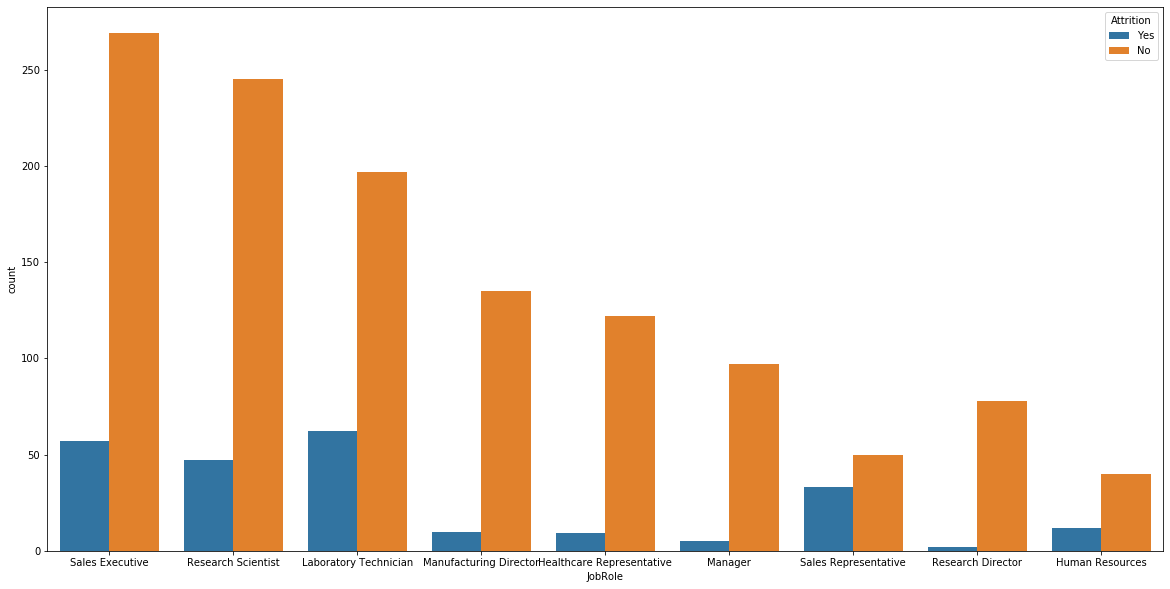

In [132]:
#Rotación por cargo
plt.figure(figsize=(20,10))
sns.countplot(data=df0,x='JobRole', hue='Attrition')

Donde se encuentran mayores rotaciones es en ejecutivo de ventas y en técnicos de laboratorio

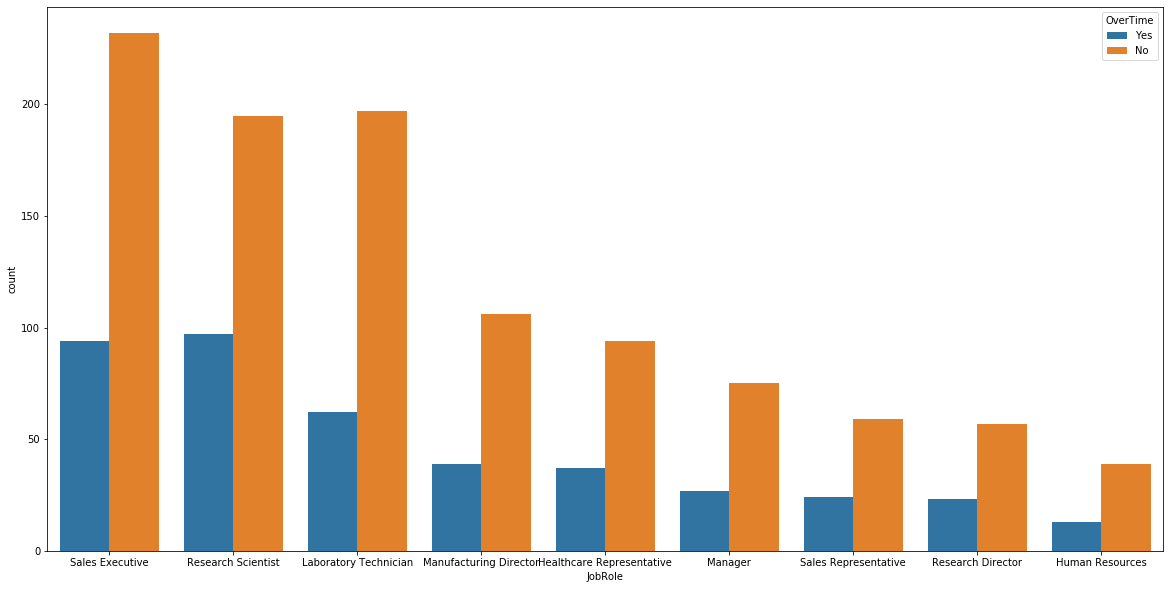

In [133]:
#Rotación por tiempo extra
plt.figure(figsize=(20,10))
sns.countplot(data=df0,x='JobRole', hue='OverTime')

In [158]:
df0.groupby(["JobRole"]).count()[["OverTime","Attrition"]]

,OverTime,Attrition
JobRole,,
Healthcare Representative,131,131
Human Resources,52,52
Laboratory Technician,259,259
Manager,102,102
Manufacturing Director,145,145
Research Director,80,80
Research Scientist,292,292
Sales Executive,326,326
Sales Representative,83,83


In [159]:
a = df0.groupby(["JobRole"]).mean()
a = a[["Age","MonthlyRate"]]
a[["OverTime","Attrition"]] = df0.groupby(["JobRole"]).count()[["OverTime","Attrition"]]
a.sort_values(by="MonthlyRate",ascending=False)

,Age,MonthlyRate,OverTime,Attrition
JobRole,,,,
Manager,46.764706,15139.578431,102,102
Research Director,44.000000,15080.550000,80,80
Manufacturing Director,38.296552,14478.965517,145,145
Sales Executive,36.889571,14471.110429,326,326
Healthcare Representative,39.809160,14400.198473,131,131
Sales Representative,30.361446,14278.204819,83,83
Laboratory Technician,34.096525,14066.061776,259,259
Research Scientist,34.236301,13927.113014,292,292
Human Resources,35.500000,13292.403846,52,52


Media de edad, media de sueldo y numero de empleados que hacen tiempo extra y rotan

Se observa como algunos empleos Research Scientist y Laboratory Technician están entre los peor pagados y ademas con el mayor numero de horas extra. 

Los ejecutivos de venta en cambio, son los que hacen más horas extra pero su sueldo tampoco es del todo malo, ¿Por qué razon son el top? ¿Tanto influye el hacer horas extra? 

# Regresión Logística: Attrition in Sales Executive

In [168]:
#Eliminar columnas innecesarias
df = df0.drop(["EmployeeCount", "Over18", "StandardHours"], axis=1)

df = df0[df0["JobRole"]=="Sales Executive"]           #Unicamente nos quedamos con los Sales Executive
#Eliminar valores nulos
df = df.dropna()
#Codificar datos categóricos
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

df = df.apply(LabelEncoder().fit_transform)

#Separar variables dependientes e independientes
X = df.drop("Attrition",axis=1)
Y = df["Attrition"]
X_columns = X.columns

# Escalado de variables
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

# Dividir el data set en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [169]:
#Regresión Logística
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.8903508771929824

In [171]:
#Pesos de cada variable 
Variables = pd.DataFrame(X_columns)
Variables.columns = ['Variables']
Variables["Peso"]=logreg.coef_[0]
Variables = Variables.reindex(Variables.Peso.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
Variables.head(10)

,Variables,Peso
0,OverTime,1.187498
1,TotalWorkingYears,-0.841648
2,MaritalStatus,0.716426
3,EnvironmentSatisfaction,-0.634364
4,YearsSinceLastPromotion,0.607097
5,NumCompaniesWorked,0.572585
6,DistanceFromHome,0.533562
7,WorkLifeBalance,-0.502320
8,JobSatisfaction,-0.498450
9,JobInvolvement,-0.419379


La predicción a mejorado a un 90% y al separar el tipo de trabajo se ve algo muy interesante, la variable que mejor predice la rotación además de las horas extra es el numero de años trabajando (inversamente). 
¿Los vendedores se queman? 

In [173]:
a = df0.groupby(["JobRole"]).mean()
a = a[["Age","MonthlyRate","TotalWorkingYears"]]
a[["OverTime","Attrition"]] = df0.groupby(["JobRole"]).count()[["OverTime","Attrition"]]
a.sort_values(by="MonthlyRate",ascending=False)

,Age,MonthlyRate,TotalWorkingYears,OverTime,Attrition
JobRole,,,,,
Manager,46.764706,15139.578431,24.549020,102,102
Research Director,44.000000,15080.550000,21.400000,80,80
Manufacturing Director,38.296552,14478.965517,12.786207,145,145
Sales Executive,36.889571,14471.110429,11.101227,326,326
Healthcare Representative,39.809160,14400.198473,14.068702,131,131
Sales Representative,30.361446,14278.204819,4.674699,83,83
Laboratory Technician,34.096525,14066.061776,7.656371,259,259
Research Scientist,34.236301,13927.113014,7.715753,292,292
Human Resources,35.500000,13292.403846,8.173077,52,52


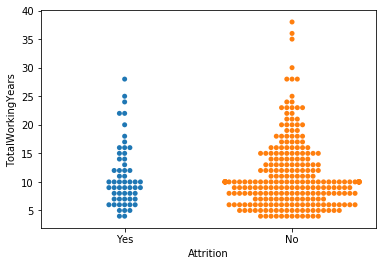

In [177]:
#Distribución rotación y sueldo
df = df0[df0["JobRole"]=="Sales Executive"]   
#Distribución puntos
a = df["TotalWorkingYears"]               
c = df["Attrition"]
sns.swarmplot(x=c  ,y=a)

Se ve una acumulación hasta los 10 años. 

Parece ser que suele ser la "vida útil" de los sales executive, una vez pasado ese humbral resulta más dificil su rotación

In [ ]:
(CONTINUARÁ)

In [4]:
df.astype('category')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
